# COGS 118A - Project Checkpoint

# Names
- Galen Ng
- Regan Yang
- Andy Chen

# Abstract 
The goal of this project is to identify whether a person with specific metrics will make more or less than $50,000 a year. The data used will be a kaggle dataset showing features that contribute to an individuals income. This would include features such as gender, race, occupation, and all the information would have to classify you. There are certain features that don't have numerical values such as race or occupation so we can one hot encode those features. With this data, we will perform some exploratory data analysis on these features and see if there are biases that we can exclude such as a feature that measures higher education.  Once all of that is done, we will used our clean dataset to classify people who make more or less than 50,000 annually.Performance of a model is measured by accuracy and f1-score.

# Background

According to the United States government <a name="incomeImportance"></a>[<sup>[1]</sup>](#importance-income), accurate survey data about income is hard to come by. There's plenty of issues in reporting data such as difficulty in understanding income questions, different interpretations of income questions, and other factors that make income reporting not as reliable as one might think. Having accurate income data is important as income data is an important metric in determining health related quality of life<a name="incomeHealth"></a>[<sup>[2]</sup>](#health-income). Furthermore, a person reaches about $50k, they can be classified as middle class.<a name="midIncome"></a>[<sup>[3]</sup>](#mid-income).

# Problem Statement
Given a set of initial circumstances (age, workclass, education, marital status, occupation, relationship, race, sex, capital gain/loss, native country), does a person make at least or less than $50k a year? To answer such a question, we can develop a ML model takes in the circumstances as input and produce a binary classification based on the data. To make sure our results are replicable by clearly documenting our steps. To make the problem measurable, we decided to use accuracy and F1-score as performance metrics. Accuracy tells us how the ratio of correct predictions over total predictions. In case the data is imbalanced, we use F1-score to get a more balanced result.

# Data
Dataset: https://www.kaggle.com/datasets/lodetomasi1995/income-classification

In [1]:
import pandas as pd

data = pd.read_csv("income_evaluation.csv")
data.shape
# 32,561 observations, 15 variables

(32561, 15)

Variable information:
- age: Age of participant (Integer value)
- workclass:  of participant (Categorical value)
- fnlwgt: How much the census thinks this participant represents in the total population (Integer value)
- education: Education level of participant (Categorical value: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool)
- education-num: Education level of participant in terms of a number (Integer value 1-16)
- marital-status: Marital status of participant (Categorical value: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
- occupation: Occupation of participant (Categorical value: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
- relationship: Relationship status of participant (Categorical value: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
- race: Race of participant (Categorical value: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
- sex: Sex of participant (Categorical value: Female, Male)
- capital-gain: Capital gain of participant (Integer value)
- capital-loss: Capital loss of participant (Integer value)
- hours-per-week: Work hours per week of participant (Continuous value)
- native-country: Native country of participant (Categorical value: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)
- Income: Income level of participant (Categorical value: >= 50k, < 50k)

Transformations/Cleaning to be done:
- Change all variables with categorical values into one-hot encodings
- Get rid of "education-num" (get rid of potential bias from higher education being a higher number)
- Normalize "age", "fnlwgt", "hours-per-week" columns (use SD away from mean)

# Proposed Solution

Since we are trying to classify whether a participant has an income >= 50k or < 50k, we can use a logistic regression or SVM classifier using different regularization strengths. Both classifiers give the probabilities of data points belonging to a binary classification. A solution can be tested by using train-test splits and comparing it to other test sets. We chose logistic regression because it provides probability based outcomes and is a computationally simple algorithm that is robust to noise. Similarly, SVM can avoid overfitting via regularization and can help the model deal with issues that arises from dealing with higher dimensional data.

# Evaluation Metrics

One evaluation metric we can use is accuracy. As we are making binary decisions, we want to know if our model is making the correct decisions for the data points its given. We can set up a good k-folds cross validation to reduce bias in the data and also look at the f1 score to measure the accuracy and quantify it. With our k-folds cross validation, we can split up the data into k-folds which allows the model to be more versatile when it comes to newer data. In this case, it would give us more accurate results when it comes to newer data.

# Imports

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Data Cleaning

In [2]:
data = pd.read_csv("income_evaluation.csv")
# For some reason some column names have a space at the start
data = data.rename(str.strip, axis='columns')
data = data.drop('education-num', axis='columns')
data['income'] = data['income'].replace([' <=50K', ' >50K'], [0, 1])
data.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [3]:
data.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000,1.000000


In [4]:
# Check for null entries
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [5]:
num_cols = ['age', 'fnlwgt', 'hours-per-week']
cat_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

In [6]:
X = data.drop('income', axis='columns')
y = data['income']

# Logistic Regression

In [7]:
pipe = Pipeline([('make_features', preprocessor),
                 ('classifier', LogisticRegression(solver='saga', max_iter=10000))])

search_space = {'classifier__C': np.logspace(-3, 3, 7),
               'classifier__penalty': ['l2', 'l1']}

best_model = GridSearchCV(pipe, search_space, cv=5, verbose=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, random_state=101)

best_model.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END classifier__C=0.001, classifier__penalty=l2;, score=0.802 total time=   1.1s
[CV 2/5] END classifier__C=0.001, classifier__penalty=l2;, score=0.791 total time=   1.1s
[CV 3/5] END classifier__C=0.001, classifier__penalty=l2;, score=0.799 total time=   1.1s
[CV 4/5] END classifier__C=0.001, classifier__penalty=l2;, score=0.799 total time=   1.1s
[CV 5/5] END classifier__C=0.001, classifier__penalty=l2;, score=0.798 total time=   0.9s
[CV 1/5] END classifier__C=0.001, classifier__penalty=l1;, score=0.756 total time=   0.9s
[CV 2/5] END classifier__C=0.001, classifier__penalty=l1;, score=0.756 total time=   1.0s
[CV 3/5] END classifier__C=0.001, classifier__penalty=l1;, score=0.759 total time=   0.9s
[CV 4/5] END classifier__C=0.001, classifier__penalty=l1;, score=0.758 total time=   1.0s
[CV 5/5] END classifier__C=0.001, classifier__penalty=l1;, score=0.758 total time=   0.7s
[CV 1/5] END classifier__C=0.01, classi

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('make_features',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'fnlwgt',
                                                                          'hours-per-week']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['workclass',
                                                                          'education',
                                                                          'marital-status',
                                   

# SVM

In [8]:
pipe2 = Pipeline([('make_features', preprocessor),
                 ('classifier', SVC())])
search_space2 = {'classifier__kernel': ['linear'],
                 'classifier__C': np.logspace(-3, 1, 5)
                }

best_model2 = GridSearchCV(pipe2, search_space2, cv=5, verbose=3)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, 
                                                    test_size=0.25, random_state=101)

best_model2.fit(X_train2, y_train2)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END classifier__C=0.001, classifier__kernel=linear;, score=0.783 total time=  10.1s
[CV 2/5] END classifier__C=0.001, classifier__kernel=linear;, score=0.788 total time=  10.2s
[CV 3/5] END classifier__C=0.001, classifier__kernel=linear;, score=0.779 total time=  10.2s
[CV 4/5] END classifier__C=0.001, classifier__kernel=linear;, score=0.782 total time=  10.0s
[CV 5/5] END classifier__C=0.001, classifier__kernel=linear;, score=0.783 total time=  10.2s
[CV 1/5] END classifier__C=0.01, classifier__kernel=linear;, score=0.830 total time=   9.3s
[CV 2/5] END classifier__C=0.01, classifier__kernel=linear;, score=0.821 total time=   9.0s
[CV 3/5] END classifier__C=0.01, classifier__kernel=linear;, score=0.835 total time=   9.2s
[CV 4/5] END classifier__C=0.01, classifier__kernel=linear;, score=0.826 total time=   9.1s
[CV 5/5] END classifier__C=0.01, classifier__kernel=linear;, score=0.834 total time=   9.5s
[CV 1/5] END cl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('make_features',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'fnlwgt',
                                                                          'hours-per-week']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['workclass',
                                                                          'education',
                                                                          'marital-status',
                                   

# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



In [32]:
# train a model and give training set error and test set error
def train_test_predictions(model, X_tr, y_tr, X_te):
    model.fit(X_tr,y_tr)
    return model.predict(X_tr), model.predict(X_te)

# do a bunch of metrics on any model result you'd like
def show_metrics(y_tr, y_te, yhat_tr, yhat_te, named):
    # accuracy scores for training and test sets
    acc_train = accuracy_score(y_tr, yhat_tr)
    acc_test = accuracy_score(y_te, yhat_te)

    print(f'training set accuracy (n={y_tr.shape[0]}): {acc_train:4.3f}')
    print(f'test set accuracy (n={y_te.shape[0]}): {acc_test:4.3f}')
    print()
    print('classificiation report on test set performance')
    print(classification_report(y_te, yhat_te))
    print()

    with sns.axes_style('white'):
        # confusion matrix
        ConfusionMatrixDisplay.from_predictions(y_te, yhat_te)
        plt.show()
        
        # roc-auc
        fpr, tpr, thresholds = roc_curve(y_te, yhat_te) 
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr,tpr,label="AUC="+str(roc_auc))
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend(loc=4)
        plt.show()
        
        #precision recall curve
        PrecisionRecallDisplay.from_predictions(y_te, yhat_te, name=named)
        plt.show()

## Linear Regression Results

In [10]:
# Best model parameters
best_model.best_params_, best_model.best_score_

({'classifier__C': 1.0, 'classifier__penalty': 'l1'}, 0.8352170352170353)

<AxesSubplot:xlabel='penalty', ylabel='C'>

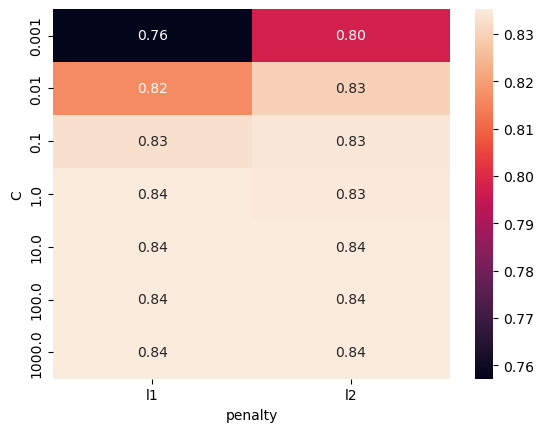

In [11]:
# See the results of different hyper parameters
results = pd.DataFrame( best_model.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we could use 1 - x
results['accuracy'] = best_model.cv_results_['mean_test_score']

# get rid of classifier__XX in columns
cols = results.columns.to_series().str.split('__').apply(lambda x: x[-1])
results.columns = cols

# lets show the results across penalty & C values
sns.heatmap( results.pivot('C','penalty','accuracy'),
             annot=True, fmt='3.2f')

training set accuracy (n=24420): 0.836
test set accuracy (n=8141): 0.840

classificiation report on test set performance
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6222
           1       0.70      0.56      0.62      1919

    accuracy                           0.84      8141
   macro avg       0.79      0.74      0.76      8141
weighted avg       0.83      0.84      0.83      8141




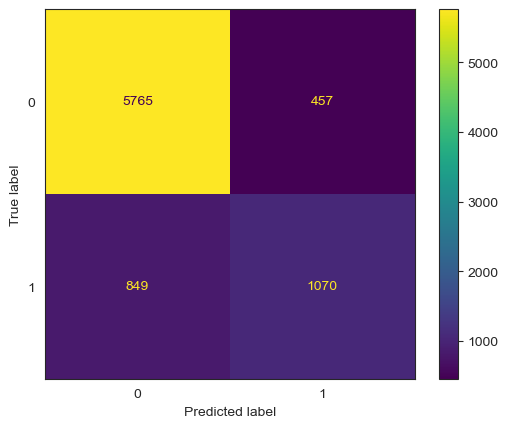

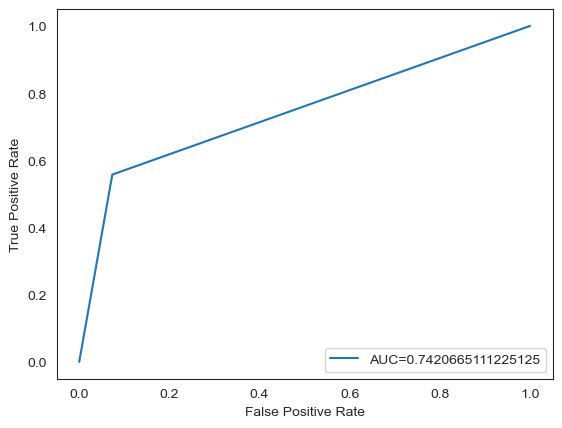

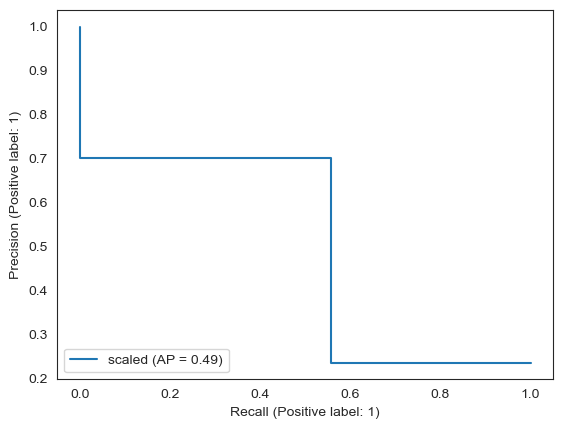

In [33]:
show_metrics(y_train, y_test, best_model.predict(X_train), best_model.predict(X_test), 'scaled')

## SVM Results

In [17]:
# Best model's parameters
best_model2.best_params_, best_model2.best_score_

({'classifier__C': 1.0, 'classifier__kernel': 'linear'}, 0.8312039312039312)

<AxesSubplot:xlabel='penalty', ylabel='C'>

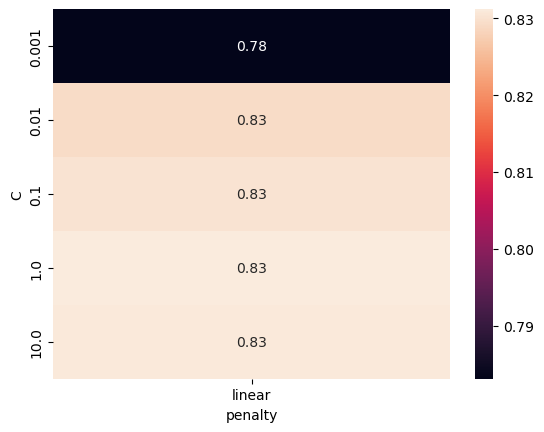

In [18]:
# See the results of different hyper parameters
results2 = pd.DataFrame( best_model2.cv_results_['params'] )

# next grab the score resulting from those parameters, add it to the data
# score is accuracy; to display it as misclassification error we could use 1 - x
results2['accuracy'] = best_model2.cv_results_['mean_test_score']

# get rid of classifier__XX in columns
cols2 = results2.columns.to_series().str.split('__').apply(lambda x: x[-1])
results2.columns = cols

# lets show the results across penalty & C values
sns.heatmap( results2.pivot('C','penalty','accuracy'),
             annot=True, fmt='3.2f')

training set accuracy (n=24420): 0.834
test set accuracy (n=8141): 0.837

classificiation report on test set performance
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      6222
           1       0.69      0.56      0.62      1919

    accuracy                           0.84      8141
   macro avg       0.78      0.74      0.76      8141
weighted avg       0.83      0.84      0.83      8141




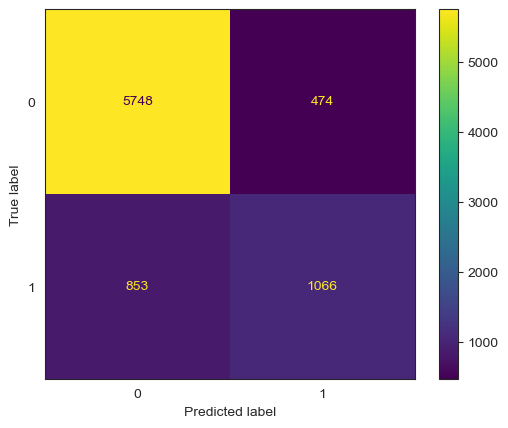

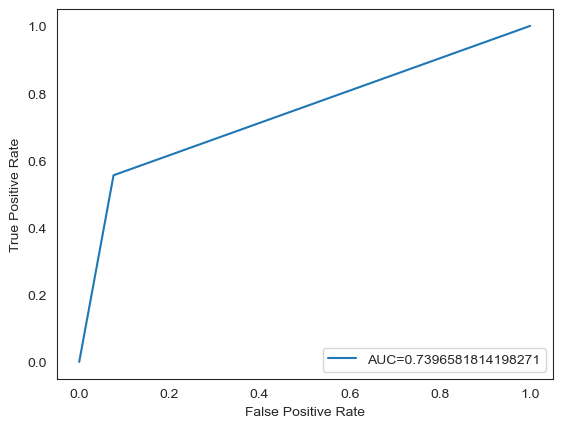

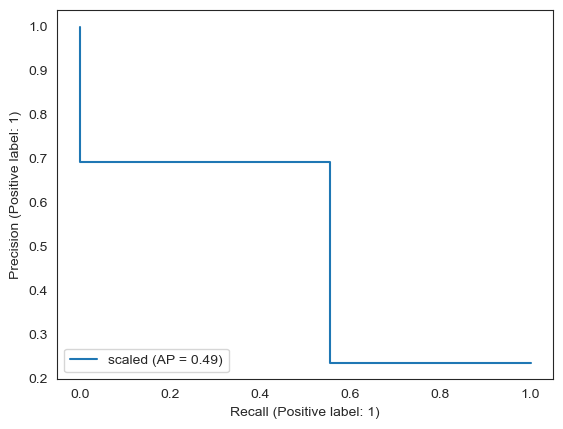

In [34]:
# Confusion matrix
show_metrics(y_train2, y_test2, best_model2.predict(X_train2), best_model2.predict(X_test2), 'scaled')

# Ethics & Privacy

The data is sourced from the 1994 Census database<a name="uci"></a>[<sup>[4]</sup>](#ucinote), so the participants consent to giving their information and the data anonymized. Further, the classification of >=50k and <50k does not expose information about what a participant's actual income is. There is potential for bias in this dataset, as certain areas of the US are known to be more/less wealthy, and there is no mention of where (besides it being in the US) the data is collected. Changing variables such as education level into one-hot encodings also removes the underlying biases between higher education and income.

# Team Expectations 

* *Respond to messages on Discord in a timely (preferably no more than 24 hrs) manner*
* *Do the work assigned to you*
* *Come to and participate in meetings*

# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 5/16  |  4PM |  Come up with ideas for Project Proposal  | Work on Project Proposal | 
| 5/24  |  4PM | Read feedback (TA+peer) | Discuss and update work based on feedback; Decide on work split | 
| 5/28  | 5PM  | Finish individual work split | Proofread + finalize checkpoint |
| 6/7 | 4PM | Read feedback | Discuss and update work based on feedback; Decide on work split  |
| 6/12  | 4PM  | Finalize individual work split | Discuss/edit project code + writing; Complete project |

# Footnotes
<a name="importance-income"></a>1.[^](#incomeImportance): https://www.census.gov/content/dam/Census/library/working-papers/1997/adrm/sm97-05.pdf<br> 
<a name="health-income"></a>2.[^](#incomeHealth): https://equityhealthj.biomedcentral.com/articles/10.1186/s12939-019-0942-1<br>
<a name="mid-income"></a>3.[^](#midIncome): https://money.usnews.com/money/personal-finance/family-finance/articles/where-do-i-fall-in-the-american-economic-class-system<br>
<a name="ucinote"></a>4.[^](#uci): http://archive.ics.uci.edu/ml/datasets/Adult